# Resonance

In this notebook, we will see how we can simulate resonance for a particle connected to a spring connected to a "wall" (In this case, actually a fixed particle). We will be using the PyCav module to conduct these experiments. First, we import the neccesary modules:

In [6]:
#NAME: Resonance
#DESCRIPTION: Simulating resonance for a particle connected to a spring that is fixed to a wall.

from pycav.mechanics import *
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pycav

We will then create the most important part of this program; a function which will return a function which defines all non-spring forces on the particle. 

It consists of the magnitude of the sinusoidal force, F, the damping constant, c, and the frequency, omega.

In [7]:
def create_damped_sinusoidal_force(F, c, omega):
    def damped_sinusoidal_force(particle,t):
        return np.array([F*np.sin(omega*t),0,0]) - c*particle.v 
    return damped_sinusoidal_force

We will then setup the simulation. We will have a fixed white particle connected by a spring to another particle.

In [8]:
k = 1.
particles = []
particles.append(Particle(pos = np.array([-5.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         color = [1., 1., 1.],
                         fixed = True))
particles.append(Particle(pos = np.array([5.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = False))
springs = []
springs.append(Spring(particle_1 = particles [0],
                     particle_2 = particles [1],
                     k = k))

We then define some starting values for omega, c, and F, and apply that force to the non-fixed particle.

In [10]:
omega = 0.5
c = 0.1
F = 0.1
particles[1].applied_force = create_damped_sinusoidal_force(F,c,omega)

We will then run the system with different values of omega, and see what happens for this particular value of c. Set visualize = True to see the simulation as it happens. This will make the simulation take far longer though.

In [11]:
my_system = System(collides = False, interacts = False, visualize = False, particles = particles, springs = springs, record_amplitudes = True)
omega_history = []
x1_history = []
while omega < 3 :
    particles[1].applied_force = create_damped_sinusoidal_force(F,c,omega)
    my_system.time = 0.
    my_system.run_for(200, dt= 0.01)
    if particles[1].amplitude != 0.:
        x1_history.append(particles[1].amplitude)
        omega_history.append(omega)
    particles[1].pos = np.array([5.,0.,0.])
    particles[1].v = np.array([0.,0.,0.])
    for particle in particles:
        particle.max_point = np.array([None])
        particle.min_point = np.array([None])
    omega += 0.05

Finally, we will plot the data we gained in the previous cell. We should see a sharp resonance peak at the point where we would expect from the analytic solution. Where would you expect it to be? Try changing the value of c, play around and see what happens. As an extension, you can subclass the Spring class so it has a non-linear Force component e.g. 
$$ F = - k(x + \frac{x^3}{10}) $$
and look at the behaviour, which would be very difficult to find analytically.

<IPython.core.display.Javascript object>


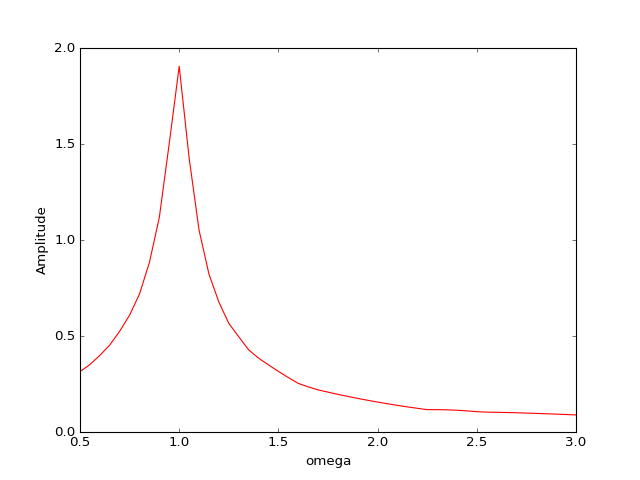

In [13]:
%matplotlib notebook
plt.plot(omega_history,x1_history,'r',label = 'x1')
plt.xlabel('omega')
plt.ylabel('Amplitude')